In [16]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Download json data from link
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = response.json()

In [3]:
# Extract the relevant attributes from the data and create a list of dictionaries
structured_data = []
for pokemon in data["pokemon"]:
    attributes = {
        "id": pokemon.get("id"),
        "num": pokemon.get("num"),
        "name": pokemon.get("name"),
        "img": pokemon.get("img"),
        "type": ", ".join(pokemon.get("type", [])),
        "height": pokemon.get("height"),
        "weight": pokemon.get("weight"),
        "candy": pokemon.get("candy"),
        "candy_count": pokemon.get("candy_count"),
        "egg": pokemon.get("egg"),
        "spawn_chance": pokemon.get("spawn_chance"),
        "avg_spawns": pokemon.get("avg_spawns"),
        "spawn_time": pokemon.get("spawn_time"),
        "multipliers": ", ".join(map(str, pokemon.get("multipliers", []))) if pokemon.get("multipliers") else "",
        "weaknesses": ", ".join(pokemon.get("weaknesses", [])) if pokemon.get("weaknesses") else "",
        "next_evolution": ", ".join([evo.get("num", "") + ": " + evo.get("name", "") for evo in pokemon.get("next_evolution", [])]),
        "prev_evolution": ", ".join([evo.get("num", "") + ": " + evo.get("name", "") for evo in pokemon.get("prev_evolution", [])])
    }
    structured_data.append(attributes)

In [5]:
#Create dataframe
df = pd.DataFrame(structured_data)
print(df)

      id  num        name                                               img  \
0      1  001   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png   
1      2  002     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2      3  003    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3      4  004  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5  005  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
..   ...  ...         ...                                               ...   
146  147  147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148  148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   
148  149  149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

               type  height    weight             c

In [7]:
# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df["spawn_chance"] < 5]
print("Pokemons with spawn rate less than 5%:")
print(spawn_rate_less_than_5)

Pokemons with spawn rate less than 5%:
      id  num        name                                               img  \
0      1  001   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png   
1      2  002     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2      3  003    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3      4  004  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5  005  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
..   ...  ...         ...                                               ...   
146  147  147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148  148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   
148  149  149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

            

In [8]:
# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = df[df["weaknesses"].str.count(",") < 3]
print("Pokemons with less than 4 weaknesses:")
print(less_than_4_weaknesses)

Pokemons with less than 4 weaknesses:
      id  num        name                                               img  \
3      4  004  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5  005  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
5      6  006   Charizard  http://www.serebii.net/pokemongo/pokemon/006.png   
6      7  007    Squirtle  http://www.serebii.net/pokemongo/pokemon/007.png   
7      8  008   Wartortle  http://www.serebii.net/pokemongo/pokemon/008.png   
..   ...  ...         ...                                               ...   
145  146  146     Moltres  http://www.serebii.net/pokemongo/pokemon/146.png   
146  147  147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148  148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

             

In [9]:
# Get all Pokemons that have no multipliers at all
no_multipliers = df[df["multipliers"] == ""]
print("Pokemons with no multipliers:")
print(no_multipliers)

Pokemons with no multipliers:
      id  num        name                                               img  \
2      3  003    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
5      6  006   Charizard  http://www.serebii.net/pokemongo/pokemon/006.png   
8      9  009   Blastoise  http://www.serebii.net/pokemongo/pokemon/009.png   
11    12  012  Butterfree  http://www.serebii.net/pokemongo/pokemon/012.png   
14    15  015    Beedrill  http://www.serebii.net/pokemongo/pokemon/015.png   
..   ...  ...         ...                                               ...   
144  145  145      Zapdos  http://www.serebii.net/pokemongo/pokemon/145.png   
145  146  146     Moltres  http://www.serebii.net/pokemongo/pokemon/146.png   
148  149  149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

                 type

In [10]:
# Get all Pokemons that do not have more than 2 evolutions
less_than_2_evolutions = df[df["next_evolution"].str.count(",") < 2]
print("Pokemons with less than 2 evolutions:")
print(less_than_2_evolutions)

Pokemons with less than 2 evolutions:
      id  num        name                                               img  \
0      1  001   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png   
1      2  002     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2      3  003    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3      4  004  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5  005  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
..   ...  ...         ...                                               ...   
146  147  147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148  148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   
148  149  149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

             

In [11]:
# Get all Pokemons whose spawn time is less than 300 seconds
df["spawn_time"] = pd.to_datetime(df["spawn_time"], format="%M:%S")
less_than_300_seconds = df[df["spawn_time"].dt.total_seconds() < 300]
print("Pokemons with spawn time less than 300 seconds:")
print(less_than_300_seconds)

ValueError: time data 'N/A' does not match format '%M:%S' (match)

In [14]:
# Get all Pokemon who have more than two types of capabilities
more_than_2_types = df[df["type"].str.count(",") > 1]
print("Pokemons with more than two types of capabilities:")
print(more_than_2_types)

Pokemons with more than two types of capabilities:
Empty DataFrame
Columns: [id, num, name, img, type, height, weight, candy, candy_count, egg, spawn_chance, avg_spawns, spawn_time, multipliers, weaknesses, next_evolution, prev_evolution]
Index: []


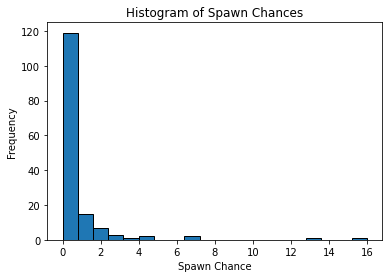

In [17]:
 # Plotting histogram of spawn chances
plt.hist(df["spawn_chance"], bins=20, edgecolor="black")
plt.xlabel("Spawn Chance")
plt.ylabel("Frequency")
plt.title("Histogram of Spawn Chances")
plt.show()

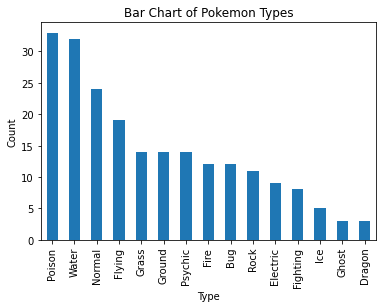

In [18]:
# Plotting bar chart of Pokemon types
type_counts = df["type"].str.split(", ", expand=True).stack().value_counts()
type_counts.plot(kind="bar")
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Bar Chart of Pokemon Types")
plt.show()

Text(0.5, 1.0, 'Spawn Rate Distribution')

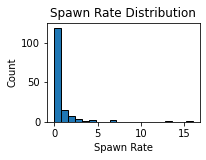

In [19]:
 # Plotting spawn rate distribution
plt.subplot(2, 2, 1)
plt.hist(df["spawn_chance"], bins=20, edgecolor="black")
plt.xlabel("Spawn Rate")
plt.ylabel("Count")
plt.title("Spawn Rate Distribution")

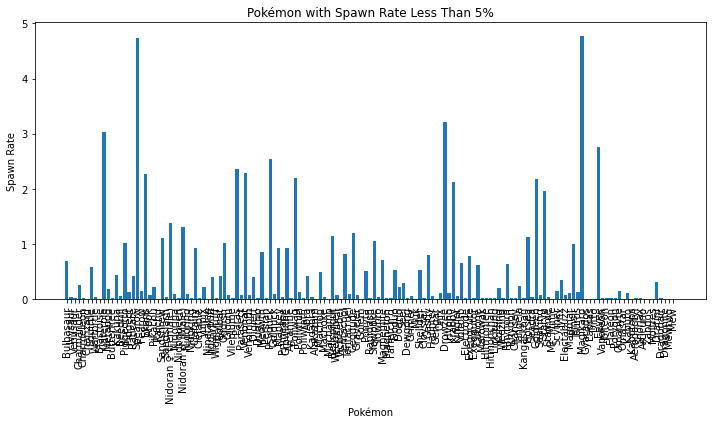

In [22]:
 # Bar plot for Pokemons with spawn rate less than 5%
plt.figure(figsize=(10, 6))
plt.bar(spawn_rate_less_than_5["name"], spawn_rate_less_than_5["spawn_chance"])
plt.xlabel("Pokémon")
plt.ylabel("Spawn Rate")
plt.title("Pokémon with Spawn Rate Less Than 5%")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()